In [7]:
get_ipython().magic(u'matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

# to show plots:
get_ipython().magic(u'pylab inline')

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.9
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Populating the interactive namespace from numpy and matplotlib


In [1]:
from common_plots import *

In [2]:
# Extract dataframes from binary
with pd.HDFStore("points_NE_I42_HB_21_Jul_15_2154.h5") as store:
    df_orig = store.full12loop_all
    df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly #'relaxed' constraints - +ve g-2 and omegah^2

In [3]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var
df_pass_all = df_pass_all[df_pass_all.HBresult > 0]
df_pass_all_h1 = subset_var(df_pass_all, 122.1, 128.1, 'mh1')
df_pass_all_h2 = subset_var(df_pass_all, 122.1, 128.1, 'mh2')
df_pass_all_strict = df_pass_all[df_pass_all.constraints == ""]
# df_pass_all_HB = df_pass_all[df_pass_all.HBresult == 1]

In [4]:
print 'Original points (no constraints):', len(df_orig.index) 
print 'With relaxed constraints (on g-2, relic density & some LHC constraints):', len(df_pass_all.index)
print 'With h1 = h125:', len(df_pass_all_h1.index)
print 'With h2 = h125:', len(df_pass_all_h2.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.7.0:',len(df_pass_all_strict.index)
# print 'Or against HiggsBounds:', len(df_pass_all_HB.index)

Original points (no constraints): 64337
With relaxed constraints (on g-2, relic density & some LHC constraints): 1195
With h1 = h125: 1160
With h2 = h125: 35
Strictly enforcing all constraints in NMSSMTools 4.7.0: 0


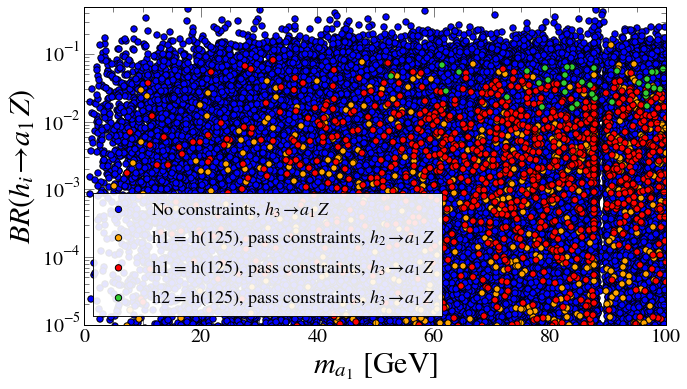

In [85]:
fig, ax = generate_fig_axes(size=[10,6])
plot_scatter(ax=ax, df=df_orig, xvar='ma1', yvar='Brh3a1z', c='blue', s=40, label=r'No constraints, $h_3 \to a_1Z$')
# plot_scatter(ax=ax, df=df_orig, xvar='ma1', yvar='Brh2a1z', c='cyan', label=r'No constraints, $h_2 \to a_1Z$')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='ma1', yvar='Brh2a1z', c='orange', s=40, label=r'h1 = h(125), pass constraints, $h_2 \to a_1Z$')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='ma1', yvar='Brh3a1z', c='red', s=40, label=r"h1 = h(125), pass constraints, $h_3 \to a_1Z$")
plot_scatter(ax=ax, df=df_pass_all_h2, xvar='ma1', yvar='Brh3a1z', c='limegreen', s=40, label=r'h2 = h(125), pass constraints, $h_3 \to a_1Z$')
plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
plt.ylabel(r"$BR(h_i \to a_1Z)$")
plt.xlim(0,100)
plt.ylim(0.00001,0.5)
plt.yscale('log')
plt.legend(loc=3, fontsize=18)

In [116]:
df_pass_all_h1.columns.values

array(['mtau', 'mh1', 'mh2', 'mh3', 'ma1', 'ma2', 'mhc', 'mstop1',
       'mstop2', 'msbottom1', 'msbottom2', 'tgbeta', 'mueff', 'lambda_',
       'kappa', 'alambda', 'akappa', 'm0', 'm12', 'a0', 'm3', 'mu3', 'mq3',
       'au3', 'Brh1gg', 'Brh1tautau', 'Brh1cc', 'Brh1bb', 'Brh1ww',
       'Brh1zz', 'Brh1gammagamma', 'Brh1zgamma', 'Brh1a1a1', 'Brh1a1z',
       'Brh2gg', 'Brh2tautau', 'Brh2bb', 'Brh2ww', 'Brh2zz',
       'Brh2gammagamma', 'Brh2zgamma', 'Brh2a1a1', 'Brh2a1z', 'Brh2h1h1',
       'Brh3gg', 'Brh3tautau', 'Brh3bb', 'Brh3ww', 'Brh3zz',
       'Brh3gammagamma', 'Brh3zgamma', 'Brh3h1h1', 'Brh3h2h2', 'Brh3h1h2',
       'Brh3a1a1', 'Brh3a1z', 'Bra1mumu', 'Bra1tautau', 'Bra1bb', 'Bra1gg',
       'Bra1cc', 'Bra1ss', 'h1ggrc2', 'h1bbrc2', 'h1vvrc2', 'h2ggrc2',
       'h2bbrc2', 'h2vvrc2', 'h3ggrc2', 'h3bbrc2', 'h3vvrc2', 'a1ggrc2',
       'a1tautaurc2', 'a1bbrc2', 'omega', 'dmdiag1', 'dmdiag2', 'dmdiag3',
       'file', 'constraints', 'Del_a_mu', 'HBresult', 'HBobsratio',
       'HB

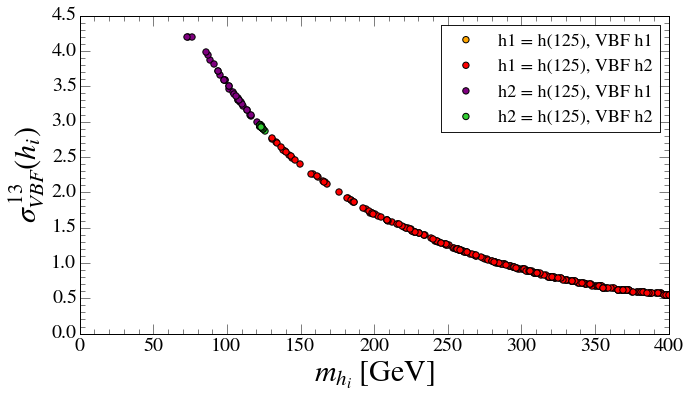

In [137]:
fig, ax = generate_fig_axes(size=[10,6])
# plot_scatter(ax=ax, df=df_orig, xvar='ma1', yvar='xsec_vbf13_h1', c='blue', s=40, label=r'No constraints, $h_3 \to a_1Z$')
# plot_scatter(ax=ax, df=df_orig, xvar='ma1', yvar='Brh2a1z', c='cyan', label=r'No constraints, $h_2 \to a_1Z$')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='mh1', yvar='xsec_vbf13_h1', c='orange', s=40, label=r'h1 = h(125), VBF h1')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='mh2', yvar='xsec_vbf13_h2', c='red', s=40, label=r"h1 = h(125), VBF h2")
plot_scatter(ax=ax, df=df_pass_all_h2, xvar='mh1', yvar='xsec_vbf13_h1', c='purple', s=40, label=r'h2 = h(125), VBF h1')
plot_scatter(ax=ax, df=df_pass_all_h2, xvar='mh2', yvar='xsec_vbf13_h2', c='limegreen', s=40, label=r'h2 = h(125), VBF h2')
plt.xlabel(r'$m_{h_i}\ \mathrm{[GeV]}$')
plt.ylabel(r"$\sigma^{13}_{VBF}(h_i)$")
plt.xlim(0,400)
# plt.ylim(0, 5.5)
# plt.yscale('log')
plt.legend(loc=0, fontsize=18)

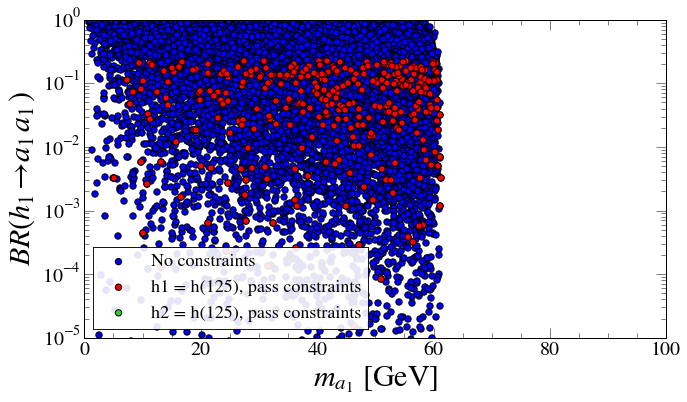

In [95]:
fig, ax = generate_fig_axes(size=[10,6])
plot_scatter(ax=ax, df=df_orig, xvar='ma1', yvar='Brh1a1a1', c='blue', s=40, label=r'No constraints')
# plot_scatter(ax=ax, df=df_orig, xvar='ma1', yvar='Brh2a1z', c='cyan', label=r'No constraints, $h_2 \to a_1Z$')
# plot_scatter(ax=ax, df=df_pass_all_h1, xvar='ma1', yvar='Brh2a1z', c='orange', s=40, label=r'h1 = h(125), pass constraints, $h_2 \to a_1Z$')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='ma1', yvar='Brh1a1a1', c='red', s=40, label=r"h1 = h(125), pass constraints")
plot_scatter(ax=ax, df=df_pass_all_h2, xvar='ma1', yvar='Brh1a1a1', c='limegreen', s=40, label=r'h2 = h(125), pass constraints')
plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
plt.ylabel(r"$BR(h_1 \to a_1a_1)$")
plt.xlim(0,100)
plt.ylim(0.00001,1)
plt.yscale('log')
plt.legend(loc=3, fontsize=18)

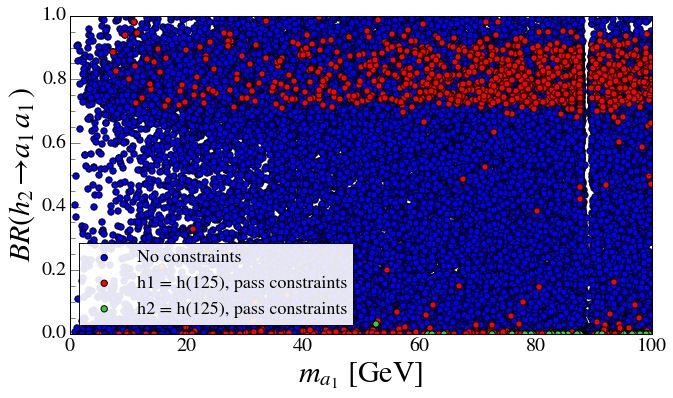

In [102]:
fig, ax = generate_fig_axes(size=[10,6])
plot_scatter(ax=ax, df=df_orig, xvar='ma1', yvar='Brh2a1a1', c='blue', s=40, label=r'No constraints')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='ma1', yvar='Brh2a1a1', c='red', s=40, label=r"h1 = h(125), pass constraints")
plot_scatter(ax=ax, df=df_pass_all_h2, xvar='ma1', yvar='Brh2a1a1', c='limegreen', s=40, label=r'h2 = h(125), pass constraints')
plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
plt.ylabel(r"$BR(h_2 \to a_1a_1)$")
plt.xlim(0,100)
plt.ylim(0,1)
# plt.yscale('log')
plt.legend(loc=3, fontsize=18)

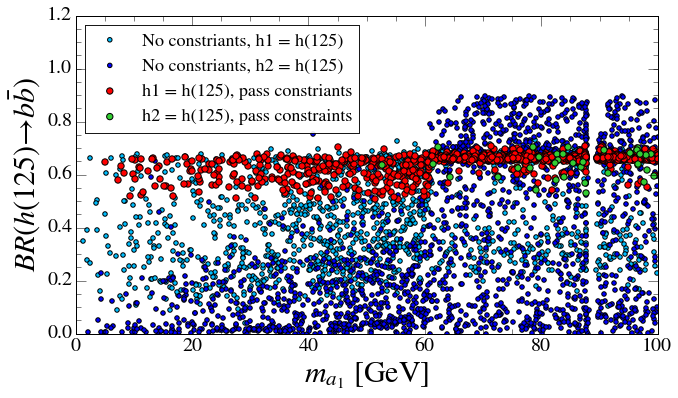

In [104]:
fig, ax = generate_fig_axes(size=[10,6])
plot_scatter(ax=ax, df=df_orig[(df_orig.mh1<128)&(df_orig.mh1>122)], xvar='ma1', yvar='Brh1bb', c='deepskyblue', label='No constriants, h1 = h(125)')
plot_scatter(ax=ax, df=df_orig[(df_orig.mh2<128)&(df_orig.mh2>122)], xvar='ma1', yvar='Brh2bb', c='blue', label='No constriants, h2 = h(125)')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='ma1', yvar='Brh1bb', c='red', s=40, label="h1 = h(125), pass constriants")
plot_scatter(ax=ax, df=df_pass_all_h2, xvar='ma1', yvar='Brh2bb', c='limegreen', s=40, label='h2 = h(125), pass constraints')
plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
plt.ylabel(r"$BR(h(125) \to b\bar{b})$")
plt.xlim(0,100)
plt.ylim(0,1.2)
# plt.yscale('log')
plt.legend(loc=2, fontsize=18)

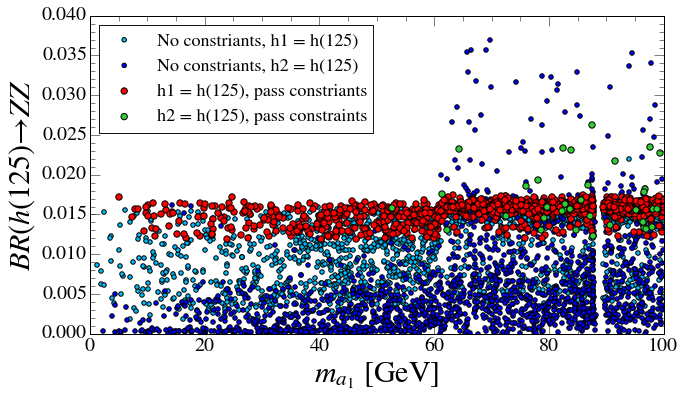

In [59]:
fig, ax = generate_fig_axes(size=[10,6])
plot_scatter(ax=ax, df=df_orig[(df_orig.mh1>122)&(df_orig.mh1<128)], xvar='ma1', yvar='Brh1zz', c='deepskyblue', label='No constriants, h1 = h(125)')
plot_scatter(ax=ax, df=df_orig[(df_orig.mh2>122)&(df_orig.mh2<128)], xvar='ma1', yvar='Brh2zz', c='blue', label='No constriants, h2 = h(125)')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='ma1', yvar='Brh1zz', c='red', s=40, label="h1 = h(125), pass constriants")
plot_scatter(ax=ax, df=df_pass_all_h2, xvar='ma1', yvar='Brh2zz', c='limegreen', s=40, label='h2 = h(125), pass constraints')
plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
plt.ylabel(r"$BR(h(125) \to ZZ$")
plt.xlim(0,100)
plt.ylim(0, 0.04)
plt.legend(loc=2, fontsize=18)

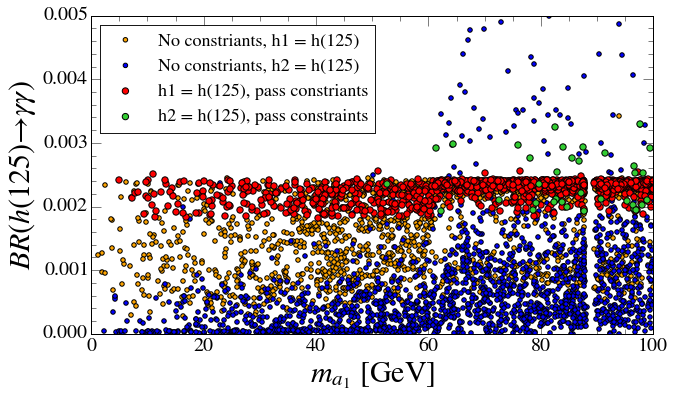

In [60]:
fig = generate_fig([10,6])
ax = generate_axes(fig)
plot_scatter(ax=ax, df=df_orig[(df_orig.mh1>122)&(df_orig.mh1<128)], xvar='ma1', yvar='Brh1gammagamma', c='orange', label='No constriants, h1 = h(125)')
plot_scatter(ax=ax, df=df_orig[(df_orig.mh2>122)&(df_orig.mh2<128)], xvar='ma1', yvar='Brh2gammagamma', c='blue', label='No constriants, h2 = h(125)')
plot_scatter(ax=ax, df=df_pass_all_h1, xvar='ma1', yvar='Brh1gammagamma', c='red', label="h1 = h(125), pass constriants", s=40)
plot_scatter(ax=ax, df=df_pass_all_h2, xvar='ma1', yvar='Brh2gammagamma', c='limegreen', s=40, label='h2 = h(125), pass constraints')
# plot_scatter(ax=ax, df=df_pass_all, xvar='mh1', yvar='Brh1zz', c='orange', label="pass constriants")
plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
plt.ylabel(r"$BR(h(125) \to \gamma\gamma)$")
plt.xlim(0,100)
plt.ylim(0, 0.005)
plt.legend(loc=2, fontsize=18)

In [106]:
def slim_dataframe(df, col_keep):
    """Make slimmed down DataFrame with only the coloumns specified."""
    df_out = df.copy()
    for col in df_out.columns:
        if col not in col_keep:
            df_out.drop(col, inplace=True, axis=1)
    return df_out

In [107]:
df_pass_all_slim = slim_dataframe(df_pass_all[df_pass_all.ma1<60], 
                              ['tgbeta', 'kappa', 'lambda_', 'mueff', 'm0', 'm12', 'a0', 'akappa', 'alambda'])

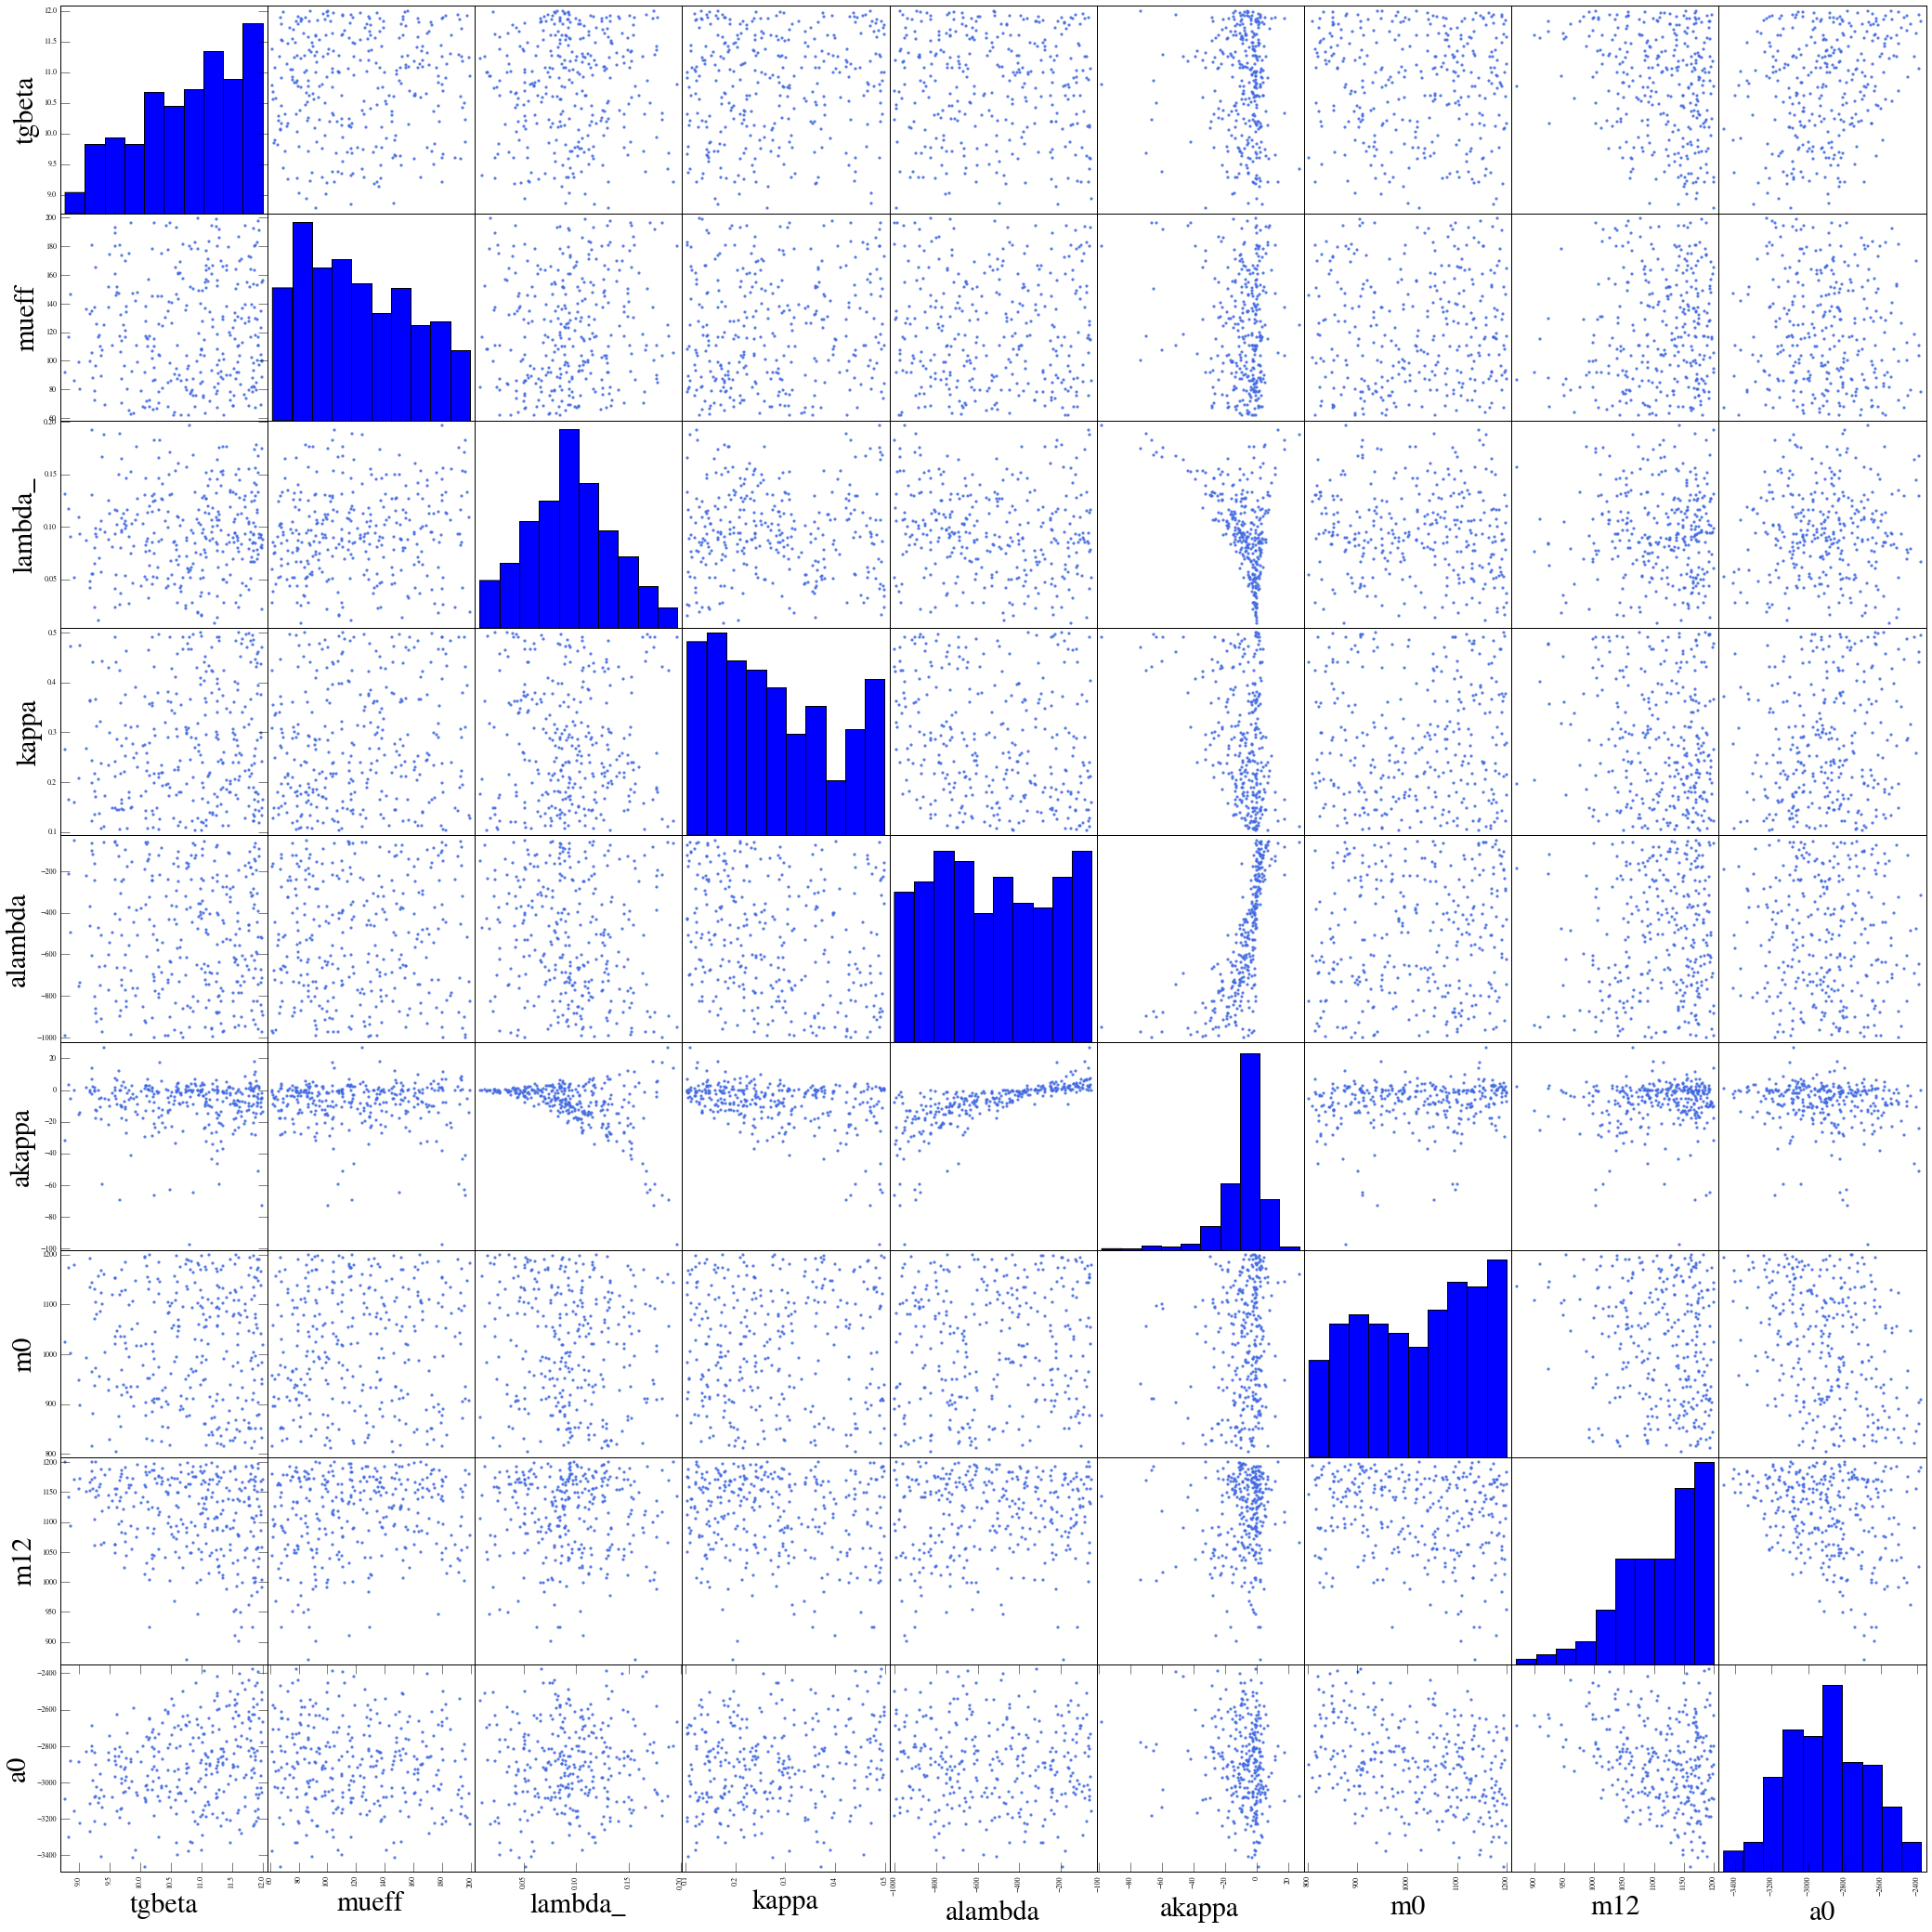

In [114]:
pd.tools.plotting.scatter_matrix(df_pass_all_slim, alpha=0.8, color='royalblue', figsize=[36,36])
plt.savefig('ma1Lt60.png')

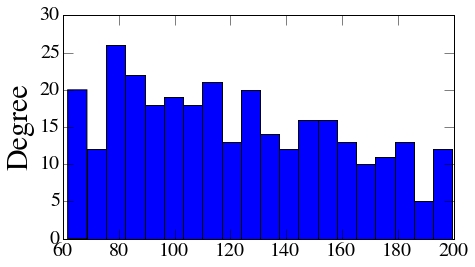

In [70]:
df_pass_all[df_pass_all.ma1<60]['mueff'].plot(kind='hist', bins=20)

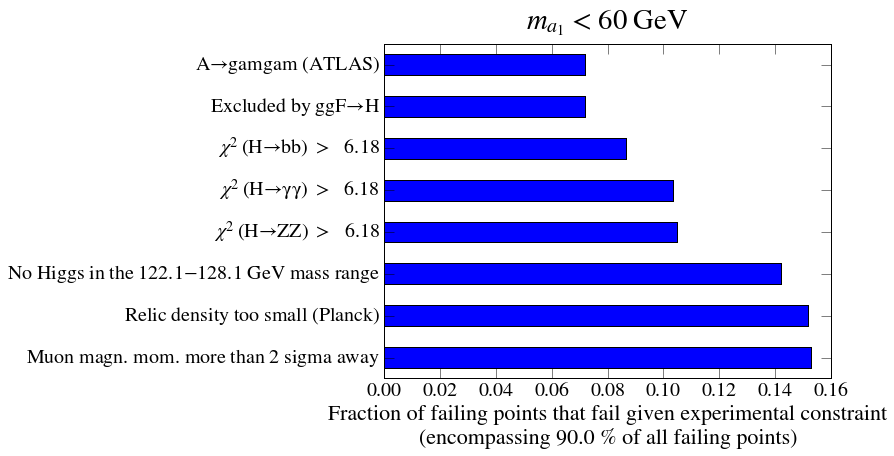

In [24]:
plot_constraints(df_orig[df_orig.ma1 < 62], r"$m_{a_1} <\ 60\ \mathrm{GeV}$")

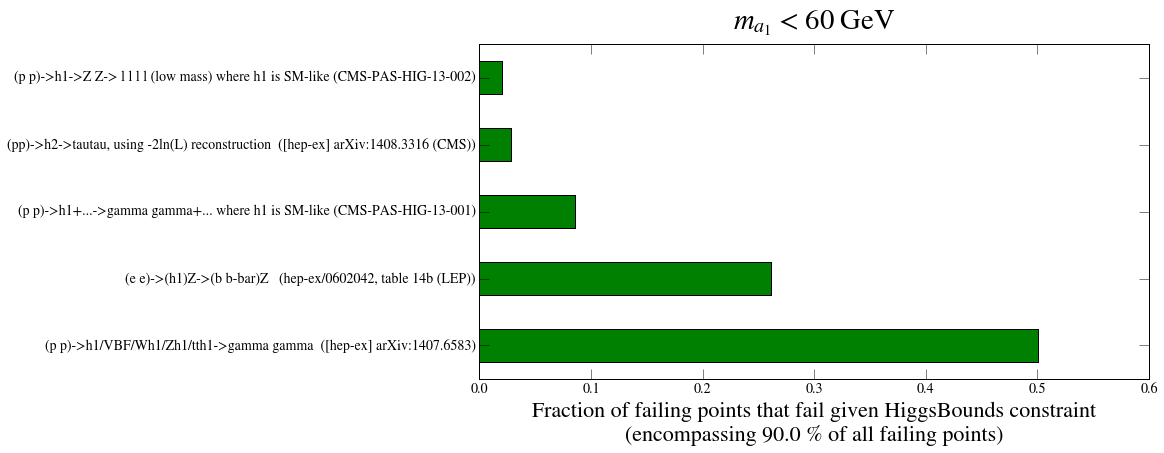

In [25]:
plot_constraints_HB(df_orig[df_orig.ma1 < 60], r"$m_{a_1} <\ 60\ \mathrm{GeV}$")